<a href="https://colab.research.google.com/github/EmanuelCAC/data_science_ads/blob/main/Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizagem Baseada em Instâncias - KNN

### Bibliotecas

In [7]:
import pickle
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

### Ligando o Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/Faculdade/6Semestre/CienciadeDados/MaterialApoio/'

Mounted at /content/drive


### Base - Risco Crédito

In [4]:
with open(caminho + 'risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [5]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [8]:
X_risco_credito = np.delete(X_risco_credito, [2,7,11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2,7,11], axis=0)

In [9]:
logistic_risco_credito = LogisticRegression(random_state=1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [10]:
logistic_risco_credito.intercept_

array([-0.80855152])

In [11]:
logistic_risco_credito.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

In [13]:
# Historia boa, divida alta, garantias nenhuma, renda > 35
# Historia ruim, divida alta, garantia adequada, renda < 15
previsoes = logistic_risco_credito.predict([[0,0,1,2], [2, 0, 0, 0]])
previsoes

array(['baixo', 'alto'], dtype=object)

### Base - Credit Data

In [14]:
with open(caminho + 'credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [15]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [16]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [17]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [19]:
logistic_credit.intercept_

array([-6.03555418])

In [20]:
logistic_credit.coef_

array([[-2.55629869, -3.72574668,  3.94362685]])

In [21]:
previsao_credit = logistic_credit.predict(X_credit_teste)
previsao_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
accuracy_score(y_credit_teste, previsao_credit)

0.944

0.944

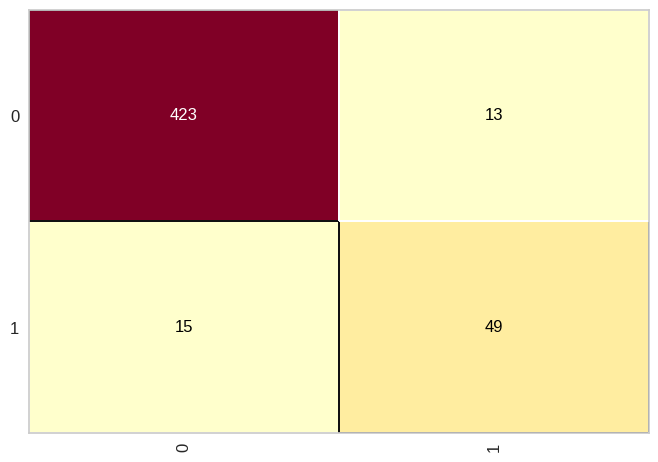

In [24]:
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [25]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.77      0.78        64

    accuracy                           0.94       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.94      0.94      0.94       500



### Base - Census

In [26]:
with open(caminho + 'census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [27]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [28]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [29]:
logistic_census = LogisticRegression(random_state=1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [34]:
logistic_census.intercept_

array([-2.10552416])

In [35]:
logistic_census.coef_

array([[-6.98488613e-02,  1.18355815e-01, -9.28364487e-03,
        -6.32571637e-02,  5.70026706e-02,  5.07381719e-02,
        -8.84284931e-02, -5.02268816e-02, -1.24694668e-01,
        -1.02481824e-01, -1.17822786e-01, -3.66227818e-02,
        -1.89874033e-02, -2.67960548e-02, -8.22889018e-02,
        -7.88822810e-02, -8.12332696e-03,  1.13390793e-02,
         1.45986267e-01,  1.18924828e-01, -7.54038219e-02,
         1.44347173e-01, -5.54400102e-01,  1.13453107e-01,
         2.46279059e-02, -1.90450912e-01,  4.34375255e-02,
         7.00139994e-01, -6.46427239e-02, -5.18599668e-01,
        -1.07259785e-01, -8.85445200e-02, -7.37373311e-02,
        -1.37206225e-02, -2.06416506e-02,  2.26862374e-02,
         2.52008753e-01, -1.67994077e-01, -1.41452274e-01,
        -8.40072161e-02, -2.57017139e-01, -2.82516289e-01,
         1.61879470e-01,  8.58540408e-02,  8.36697148e-02,
         1.09051852e-01, -2.53383593e-02, -2.30592713e-02,
         1.32752101e-01, -8.29001225e-02, -3.09430677e-0

In [30]:
previsao_census = logistic_census.predict(X_census_teste)

In [31]:
accuracy_score(y_census_teste, previsao_census)

0.8497441146366428

0.8497441146366428

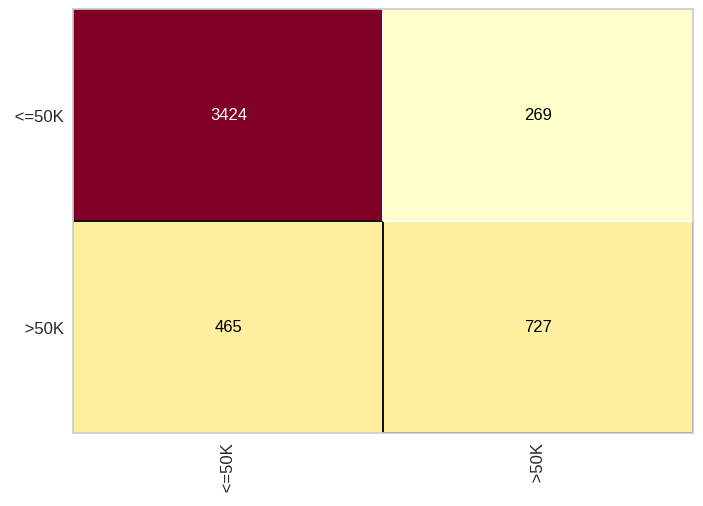

In [32]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [33]:
print(classification_report(y_census_teste, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

